In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Visualization of premodeling data

In [290]:
FILENAME = 'datasets/combined_and_cleaned_randomsampled_less.csv'

df = pd.read_csv(FILENAME)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   urls              581 non-null    object
 1   titles            581 non-null    object
 2   authors           581 non-null    object
 3   published_dates   581 non-null    object
 4   articles_content  581 non-null    object
 5   news_org          581 non-null    object
 6   dates             581 non-null    object
dtypes: object(7)
memory usage: 31.9+ KB


,urls,titles,authors,published_dates,articles_content,news_org,dates
0,https://www.rappler.com/newsbreak/explainers/w...,Here’s why COVID-19 vaccines haven’t arrived i...,SOFIA TOMACRUZ,2021-02-18 09:22:00,"MANILA, PHILIPPINES\r\nThe Philippine governme...",Rappler,2021-02-18 09:22:00
1,https://www.rappler.com/newsbreak/iq/timeline-...,TIMELINE: The Philippines’ 2021 COVID-19 vacci...,SOFIA TOMACRUZ,2021-02-04 19:43:00,"MANILA, PHILIPPINES\r\n(UPDATED) On March 1, t...",Rappler,2021-02-04 19:43:00
2,https://www.rappler.com/nation/philippines-rec...,"After initial delay, Philippines to receive As...",SOFIA TOMACRUZ,2021-03-03 14:41:00,"MANILA, PHILIPPINES\r\n(UPDATED) Malacañang sa...",Rappler,2021-03-03 14:41:00
3,https://www.rappler.com/nation/philippines-gra...,Philippines grants emergency approval for Sino...,SOFIA TOMACRUZ,2021-02-22 12:19:00,"MANILA, PHILIPPINES\r\n(UPDATED) Its lower eff...",Rappler,2021-02-22 12:19:00
4,https://www.rappler.com/nation/philippines-rec...,Philippines receives first COVID-19 vaccine de...,SOFIA TOMACRUZ,2021-02-28 16:16:00,"MANILA, PHILIPPINES\r\n(3rd UPDATE) The arriva...",Rappler,2021-02-28 16:16:00
...,...,...,...,...,...,...,...
576,https://newsinfo.inquirer.net/1390868/up-to-10...,Up to 108 million Covid-19 vaccine doses alrea...,Krissy Aguilar,"12:11 AM February 02, 2021","MANILA, Philippines — The Philippines has so f...",Inquirer,2021-02-02 00:11:00
577,https://newsinfo.inquirer.net/1399844/only-19-...,46% of adult Filipinos unwilling to get COVID-...,Gabriel Pabico Lalu,"12:58 AM February 25, 2021","MANILA, Philippines —Only 19 percent of adult ...",Inquirer,2021-02-25 00:58:00
578,https://newsinfo.inquirer.net/1377859/pfizers-...,Pfizer’s COVID-19 vaccine expected to get EUA ...,Katrina Hallare,"09:42 AM December 31, 2020","(Photo by JOEL SAGET / AFP)\nMANILA, Philippin...",Inquirer,2020-12-31 09:42:00
579,https://newsinfo.inquirer.net/1381899/ph-secur...,PH secures deal for 30M doses of Covovax COVID...,Darryl John Esguerra,"07:05 PM January 10, 2021","MANILA, Philippines — The Philippines has sign...",Inquirer,2021-01-10 19:05:00


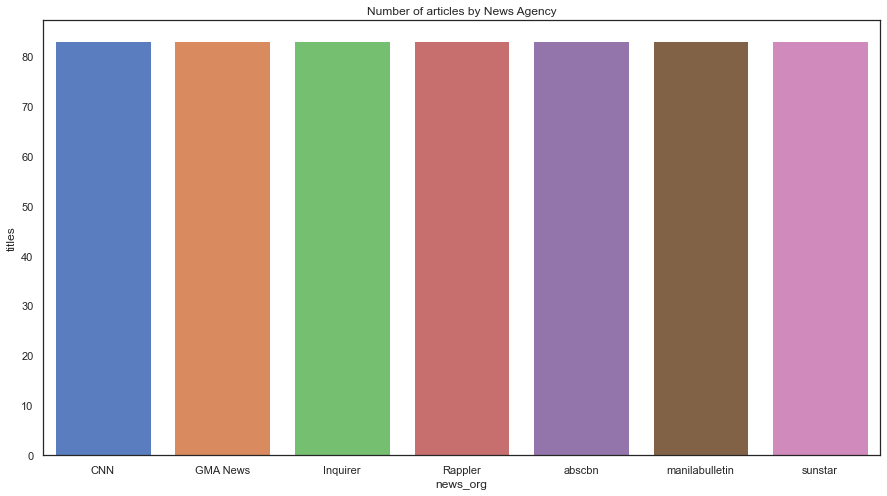

In [291]:
# Distribution of the Different Articles
distribution = df.groupby(['news_org'])['titles'].count().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(x="news_org", y="titles", data=distribution)
plt.title('Number of articles by News Agency')
plt.show()

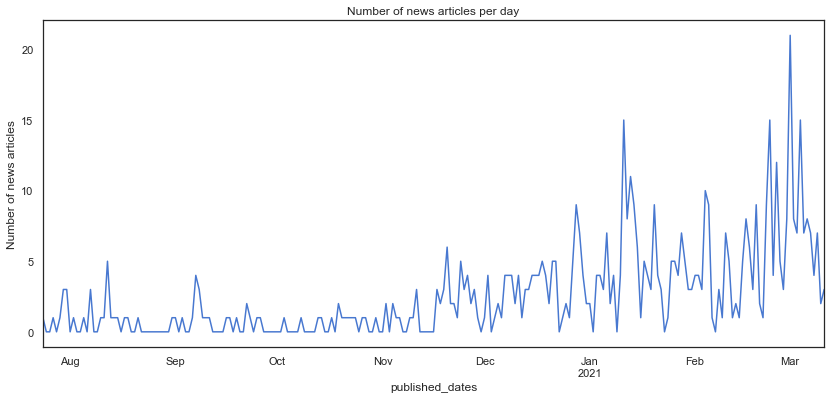

In [296]:
#Get the monthly frequency of the news
df['published_dates'] = pd.to_datetime(df['published_dates'])
date = df.set_index('published_dates')
date = date['titles'].resample('D').count() #M for month
#line chart of monthly articles

fig= plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
date.plot(ax=ax, kind='line')

#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in date.index])

plt.ylabel('Number of news articles')
plt.title('Number of news articles per day')
plt.show()

Text(0.5, 1.0, 'daily News Articles by News Agency')

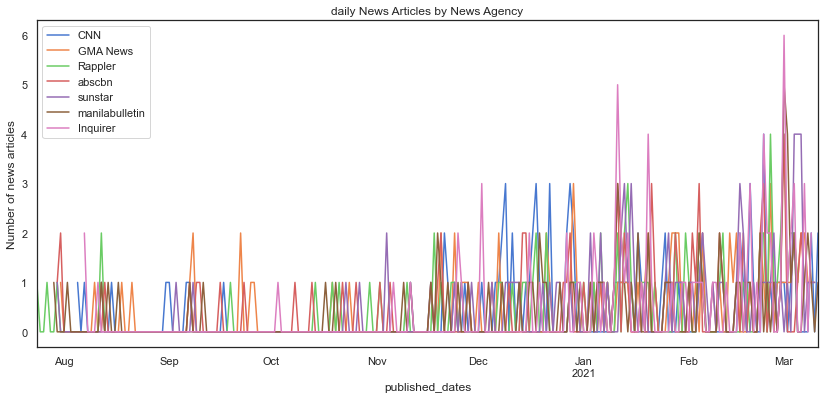

In [295]:
#line chart of monthly streams
news_org = df.set_index('published_dates')

#default is line so you can omit kind= parameter
data1 = news_org[news_org['news_org']=='CNN']['titles'].resample('D').count()
data2 = news_org[news_org['news_org']=='GMA News']['titles'].resample('D').count()
#data3 = news_org[news_org['news_org']=='Manila Times']['titles'].resample('M').count()
#data4 = news_org[news_org['news_org']=='Philippines News Agency']['titles'].resample('M').count()
#data5 = news_org[news_org['news_org']=='Philstar']['titles'].resample('M').count()
data6 = news_org[news_org['news_org']=='Rappler']['titles'].resample('D').count()
data7 = news_org[news_org['news_org']=='abscbn']['titles'].resample('D').count()
data8 = news_org[news_org['news_org']=='sunstar']['titles'].resample('D').count()
data9 = news_org[news_org['news_org']=='manilabulletin']['titles'].resample('D').count()
data10 = news_org[news_org['news_org']=='Inquirer']['titles'].resample('D').count()


fig= plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter

data1.plot(ax=ax, label='CNN')
data2.plot(ax=ax, label='GMA News')
#data3.plot(ax=ax, label='Manila Times')
#data4.plot(ax=ax, label='Philippines News Agency')
#data5.plot(ax=ax, label='Philstar')
data6.plot(ax=ax, label='Rappler')
data7.plot(ax=ax, label='abscbn')
data8.plot(ax=ax, label='sunstar')
data9.plot(ax=ax, label='manilabulletin')
data10.plot(ax=ax, label='Inquirer')
#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.legend()
plt.ylabel('Number of news articles')
plt.title('daily News Articles by News Agency')


## Visualization for the sentiment Analysis

In [198]:
FILENAME = 'datasets/model_resampled.csv'
dfart = pd.read_csv(FILENAME)
dfart.info()
dfart.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   urls                           581 non-null    object 
 1   titles                         581 non-null    object 
 2   authors                        581 non-null    object 
 3   published_dates                581 non-null    object 
 4   articles_content               581 non-null    object 
 5   news_org                       581 non-null    object 
 6   dates                          581 non-null    object 
 7   articles_summary               581 non-null    object 
 8   dominant_topic                 581 non-null    float64
 9   topic_percentage_contribution  581 non-null    float64
 10  keywords                       581 non-null    object 
 11  text                           581 non-null    object 
 12  polarity                       581 non-null    flo

,dominant_topic,topic_percentage_contribution,polarity,negativity,neutrality,positivity,subjectivity
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,0.977625,0.824195,0.564757,0.075136,0.785979,0.138880,0.383317
std,0.837390,0.176287,0.662317,0.056020,0.073532,0.055278,0.094424
min,0.000000,0.365300,-0.998900,0.000000,0.526000,0.000000,0.000000
25%,0.000000,0.680000,0.542300,0.034000,0.735000,0.103000,0.325111
50%,1.000000,0.889400,0.915500,0.066000,0.781000,0.136000,0.381357
75%,2.000000,0.988300,0.975600,0.104000,0.837000,0.176000,0.437798
max,2.000000,0.998500,0.999100,0.310000,1.000000,0.358000,0.750000


In [174]:
FILENAME = 'datasets/model_title.csv'
dftitle = pd.read_csv(FILENAME)
dftitle.info()
dftitle.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   urls                           581 non-null    object 
 1   titles                         581 non-null    object 
 2   authors                        581 non-null    object 
 3   published_dates                581 non-null    object 
 4   articles_content               581 non-null    object 
 5   news_org                       581 non-null    object 
 6   dates                          581 non-null    object 
 7   articles_summary               581 non-null    object 
 8   dominant_topic                 581 non-null    float64
 9   topic_percentage_contribution  581 non-null    float64
 10  keywords                       581 non-null    object 
 11  text                           581 non-null    object 
 12  polarity                       581 non-null    flo

,dominant_topic,topic_percentage_contribution,polarity,negativity,neutrality,positivity,subjectivity
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,2.657487,0.827874,0.046985,0.070048,0.813143,0.115095,0.198234
std,1.688113,0.103969,0.276525,0.160566,0.244730,0.197368,0.283382
min,0.000000,0.166700,-0.886000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.831800,0.000000,0.000000,0.625000,0.000000,0.000000
50%,3.000000,0.860400,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,0.880700,0.077200,0.000000,1.000000,0.238000,0.400000
max,5.000000,0.950700,0.836000,1.000000,1.000000,1.000000,1.000000


#### Visualization by Analysis

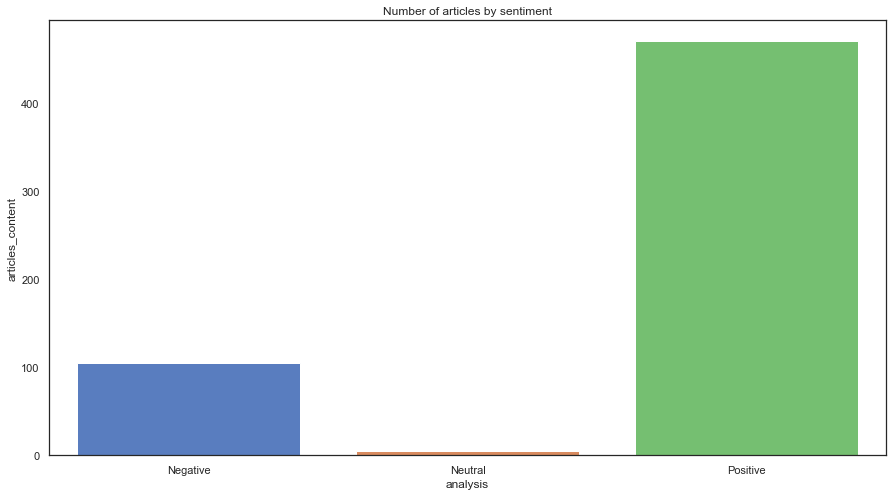

In [199]:
# Distribution of the Different Articles
distribution = dfart.groupby(['analysis'])['articles_content'].count().reset_index()
plt.figure(figsize=(15, 8))
sns.set(style="white", palette="muted", color_codes=True)
sns.barplot(x="analysis", y="articles_content", data=distribution)
plt.title('Number of articles by sentiment')
plt.show()

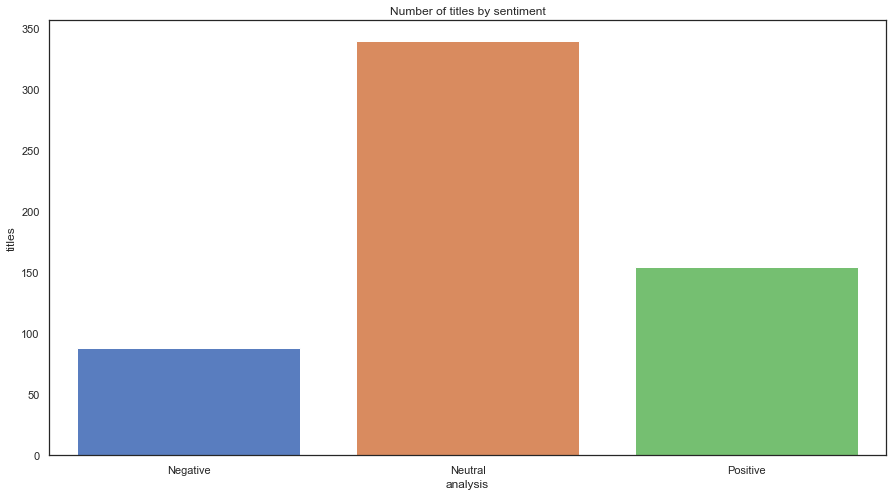

In [185]:
# Distribution of the Different Articles
distribution = dftitle.groupby(['analysis'])['titles'].count().reset_index()
plt.figure(figsize=(15, 8))
sns.set(style="white", palette="muted", color_codes=True)
sns.barplot(x="analysis", y="titles", data=distribution)
plt.title('Number of titles by sentiment')
plt.show()

#### Subjectivity vs Polarity 

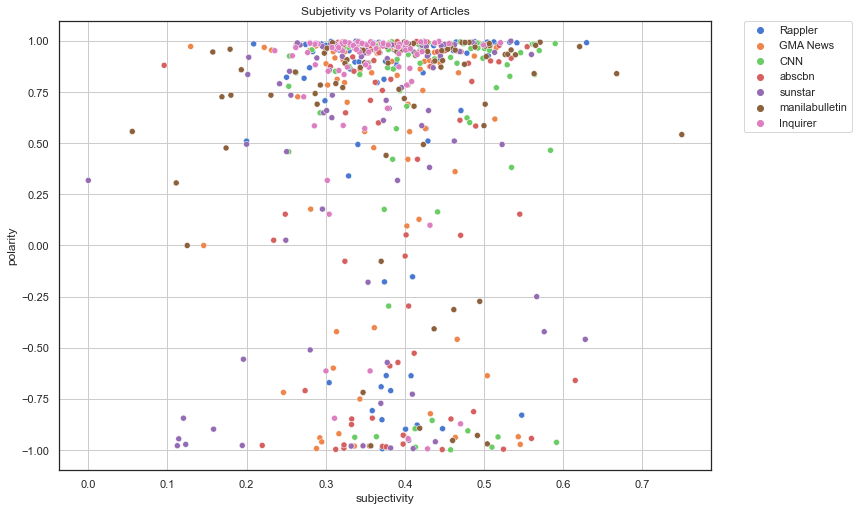

In [260]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.scatterplot(data=dfart, x="subjectivity", y="polarity", hue='news_org').set_title('Subjetivity vs Polarity of Articles')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

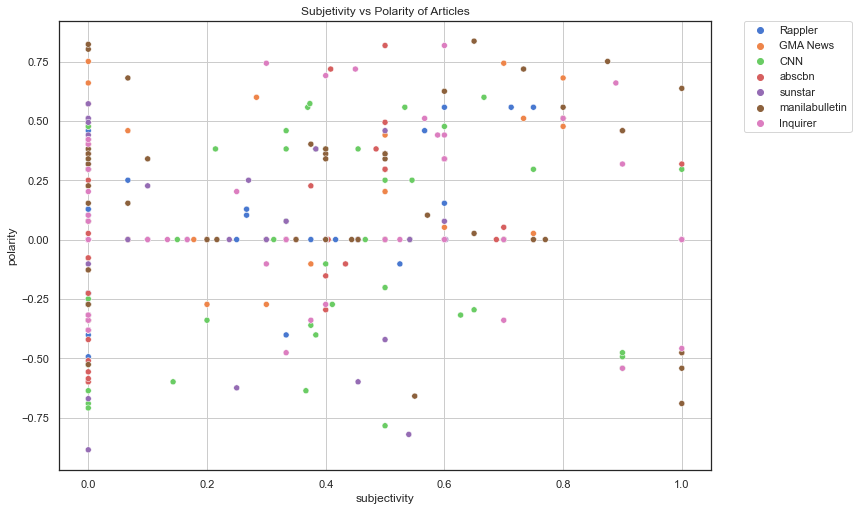

In [258]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.scatterplot(data=dftitle, x="subjectivity", y="polarity", hue='news_org').set_title('Subjetivity vs Polarity of Articles')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

#### Subjectivity vs Polarity by News Agency

Text(0.5, 0.98, 'Subjectivity vs Polarity by News agency')

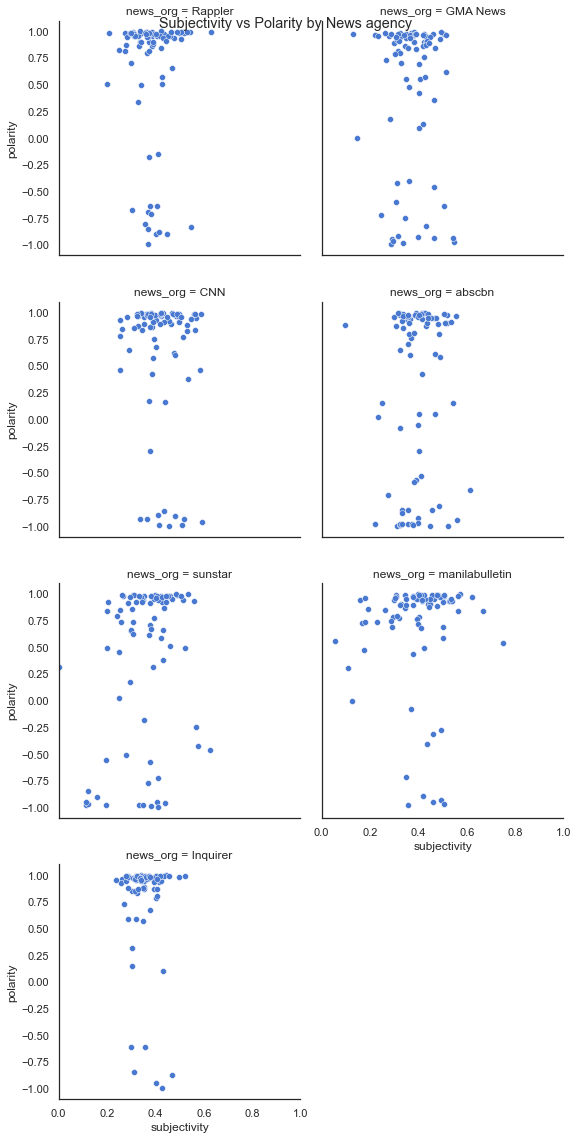

In [256]:
sns.set(style="white", palette="muted", color_codes=True)
g = sns.FacetGrid(dfart, col = 'news_org', col_wrap = 2, height = 4, xlim=(0,1))
g.map(sns.scatterplot, 'subjectivity', 'polarity')
g.add_legend()
g.fig.suptitle('Subjectivity vs Polarity by News agency')

Text(0.5, 0.98, 'Subjectivity vs Polarity by News agency')

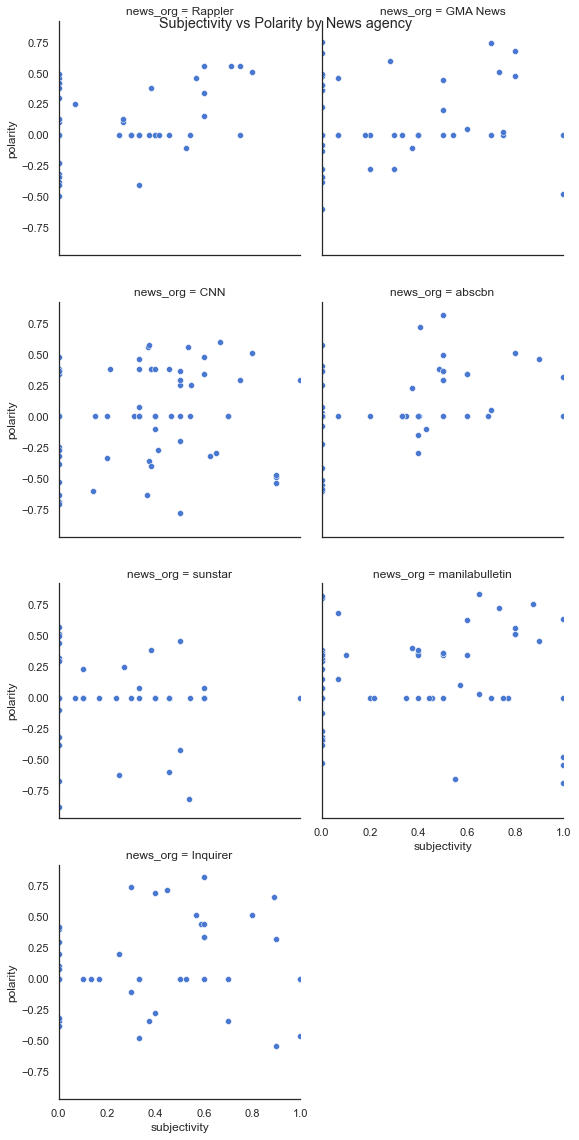

In [257]:
sns.set(style="white", palette="muted", color_codes=True)
g = sns.FacetGrid(dftitle, col = 'news_org', col_wrap = 2, height = 4, xlim=(0,1))
g.map(sns.scatterplot, 'subjectivity', 'polarity')
g.add_legend()
g.fig.suptitle('Subjectivity vs Polarity by News agency')

#### Subjectivity and Polarity Histogram

Text(0.5, 1.0, 'Histogram of Subjectivity of Articles')

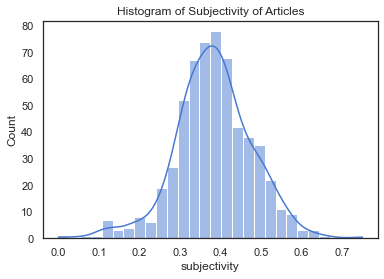

In [213]:
sns.set(style="white", palette="muted", color_codes=True)
sns.histplot(data=dfart, x="subjectivity", kde=True).set_title('Histogram of Subjectivity of Articles')

Text(0.5, 1.0, 'Histogram of Subjectivity of Titles')

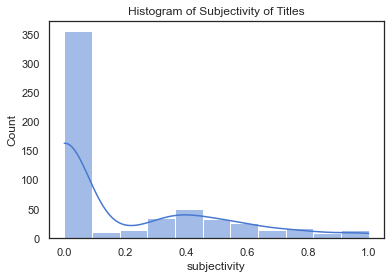

In [212]:
sns.set(style="white", palette="muted", color_codes=True)
sns.histplot(data=dftitle, x="subjectivity", kde=True).set_title('Histogram of Subjectivity of Titles')

Text(0.5, 1.0, 'Histogram of Polarity of Articles')

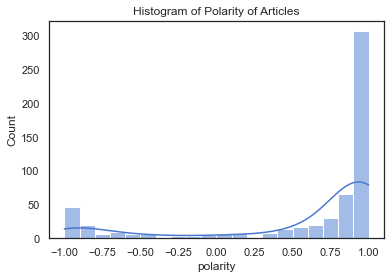

In [211]:
sns.set(style="white", palette="muted", color_codes=True)
sns.histplot(data=dfart, x="polarity", kde=True).set_title('Histogram of Polarity of Articles')

Text(0.5, 1.0, 'Histogram of Polarity of Titles')

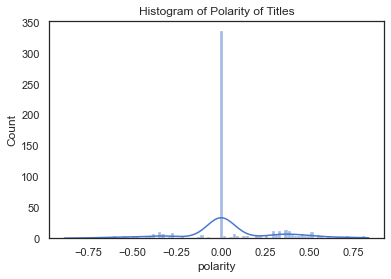

In [210]:
sns.set(style="white", palette="muted", color_codes=True)
sns.histplot(data=dftitle, x="polarity", kde=True).set_title('Histogram of Polarity of Titles')

#### Subjectivity and Polarity Histogram by News Agency

Text(0.5, 0.98, 'Subjectivity of Articles by News agency')

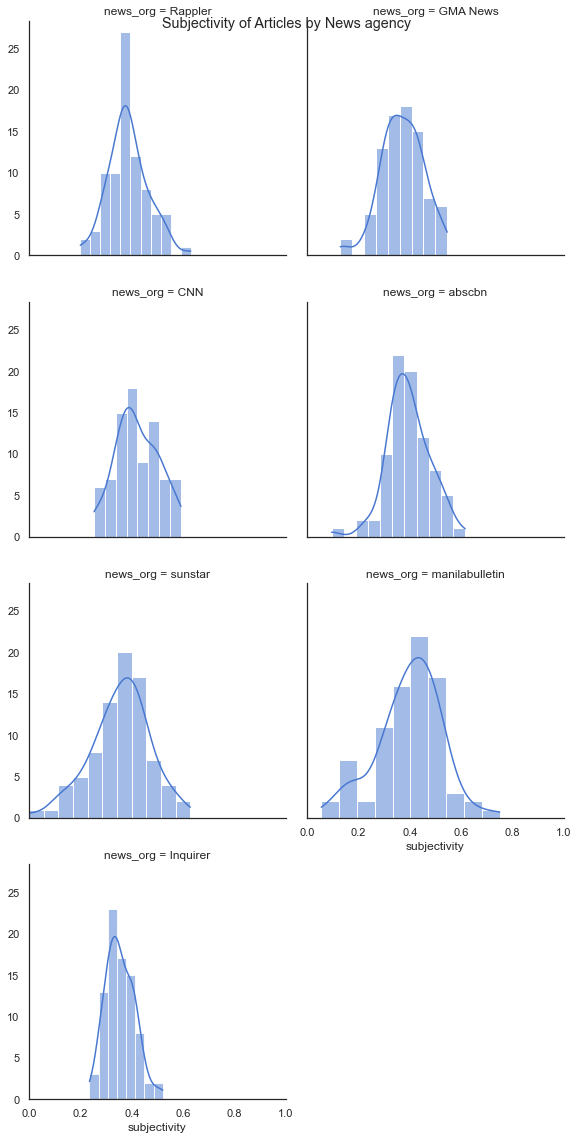

In [209]:
sns.set(style="white", palette="muted", color_codes=True)
g = sns.FacetGrid(dfart, col = 'news_org', col_wrap = 2, height = 4, xlim=(0,1))
g.map(sns.histplot, 'subjectivity', kde=True)
g.add_legend()
g.fig.suptitle('Subjectivity of Articles by News agency')

Text(0.5, 0.98, 'Subjectivity of Titles by News agency')

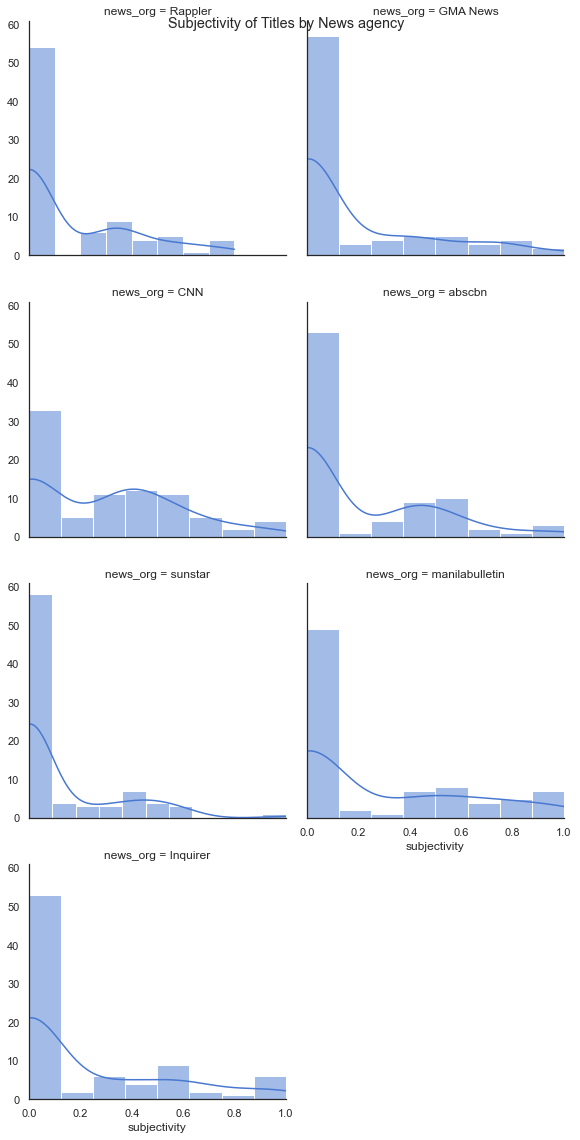

In [208]:
sns.set(style="white", palette="muted", color_codes=True)
g = sns.FacetGrid(dftitle, col = 'news_org', col_wrap = 2, height = 4, xlim=(0,1))
g.map(sns.histplot, 'subjectivity', kde=True)
g.add_legend()
g.fig.suptitle('Subjectivity of Titles by News agency')

Text(0.5, 0.98, 'Polarity of Articles by News agency')

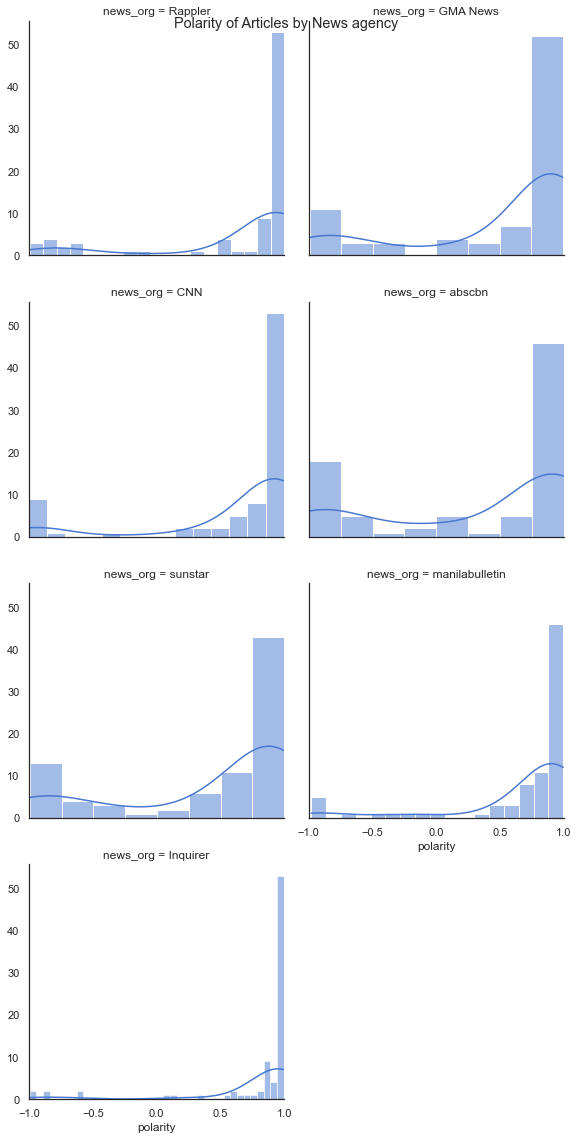

In [207]:
sns.set(style="white", palette="muted", color_codes=True)
g = sns.FacetGrid(dfart, col = 'news_org', col_wrap = 2, height = 4, xlim=(-1,1))
g.map(sns.histplot, 'polarity', kde=True)
g.add_legend()
g.fig.suptitle('Polarity of Articles by News agency')

Text(0.5, 0.98, 'Polarity of Titles by News agency')

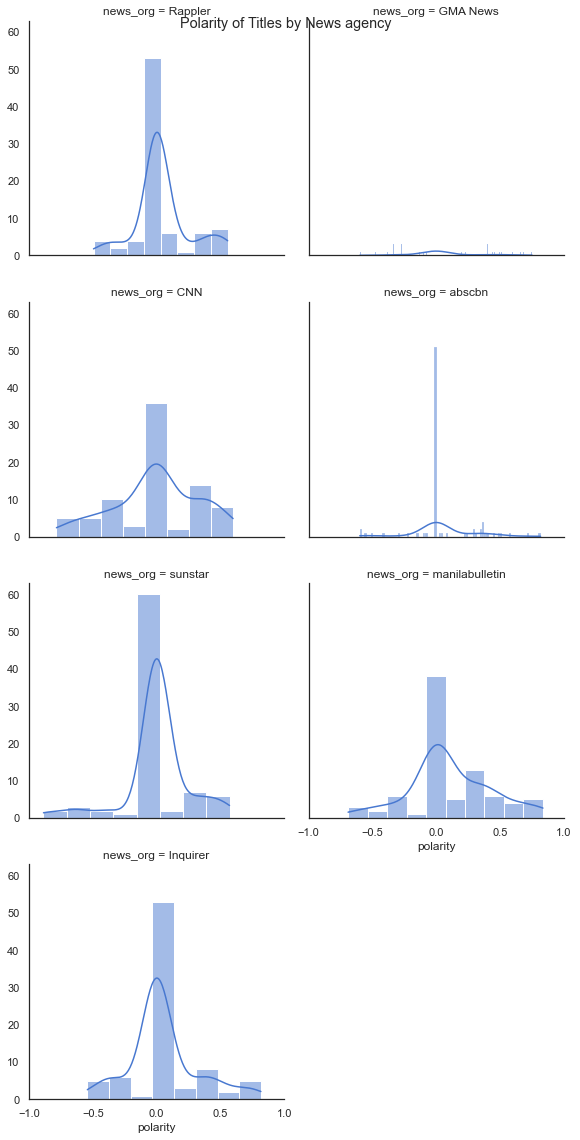

In [206]:
sns.set(style="white", palette="muted", color_codes=True)
g = sns.FacetGrid(dftitle, col = 'news_org', col_wrap = 2, height = 4, xlim=(-1,1))
g.map(sns.histplot, 'polarity', kde=True)
g.add_legend()
g.fig.suptitle('Polarity of Titles by News agency')

#### Subjectivity and Polarity Scatter Plot by News Agency

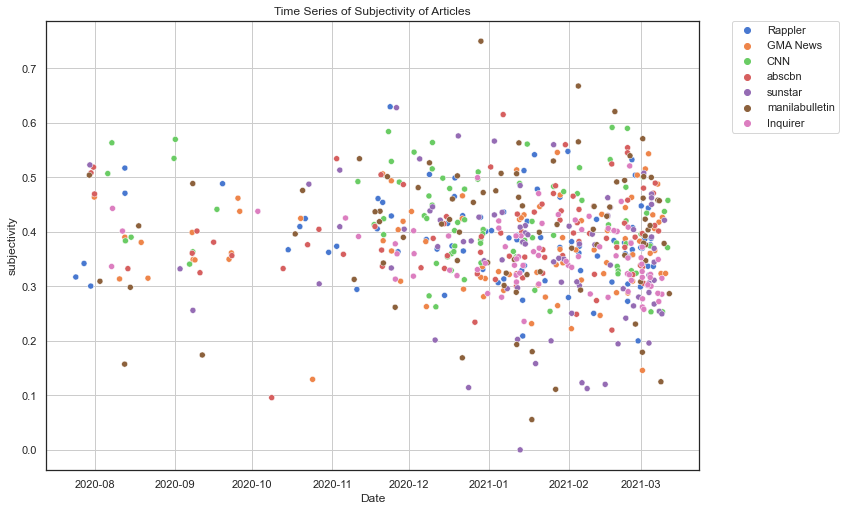

In [220]:
dfart['Date'] = pd.to_datetime(dfart['published_dates'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.scatterplot(data=dfart, x="Date", y="subjectivity", hue = 'news_org').set_title('Time Series of Subjectivity of Articles')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

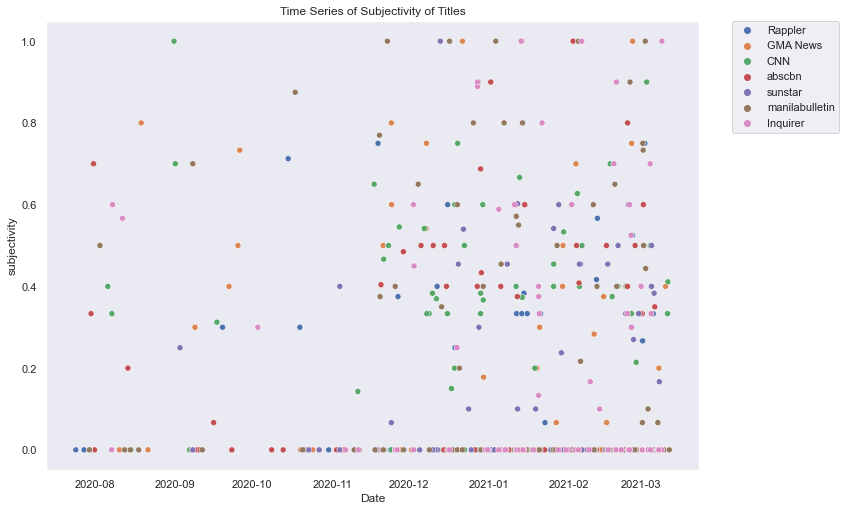

In [221]:
dftitle['Date'] = pd.to_datetime(dfart['published_dates'])
sns.set(style="white", palette="muted", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=dftitle, x="Date", y="subjectivity", hue = 'news_org').set_title('Time Series of Subjectivity of Titles')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

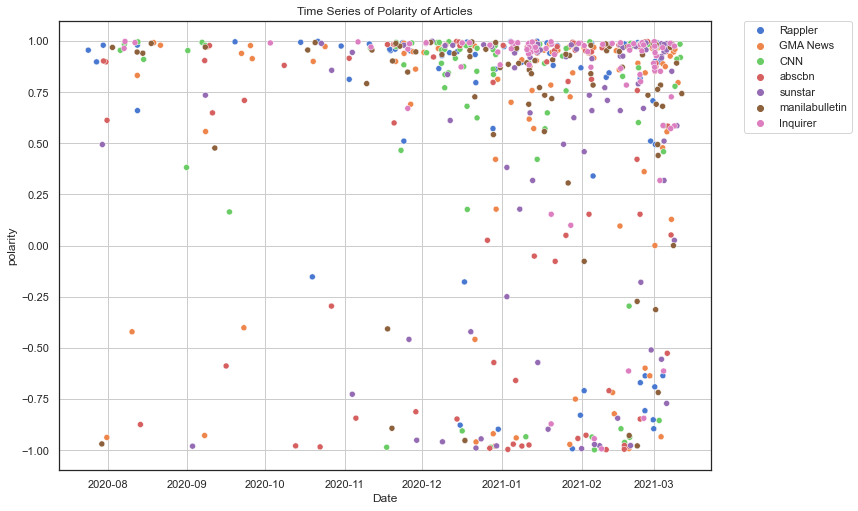

In [223]:
dfart['Date'] = pd.to_datetime(dfart['published_dates'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.scatterplot(data=dfart, x="Date", y="polarity", hue = 'news_org').set_title('Time Series of Polarity of Articles')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

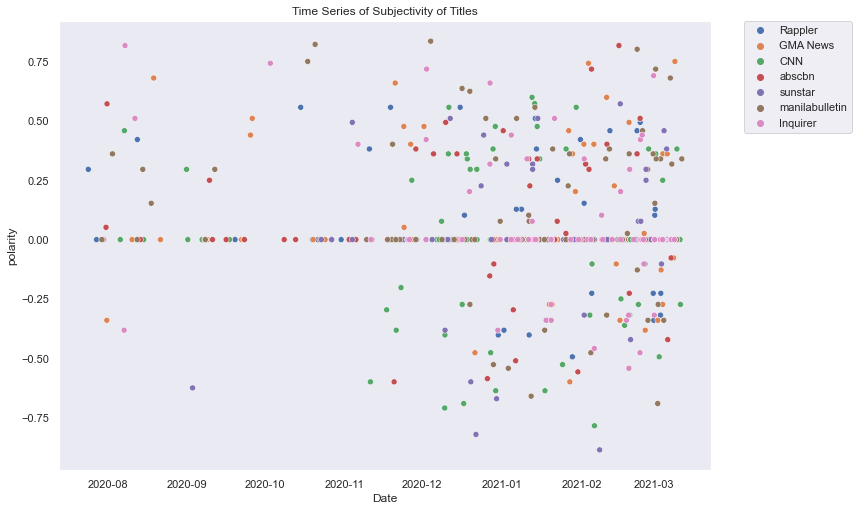

In [224]:
dftitle['Date'] = pd.to_datetime(dfart['published_dates'])
sns.set(style="white", palette="muted", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=dftitle, x="Date", y="polarity", hue = 'news_org').set_title('Time Series of Subjectivity of Titles')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

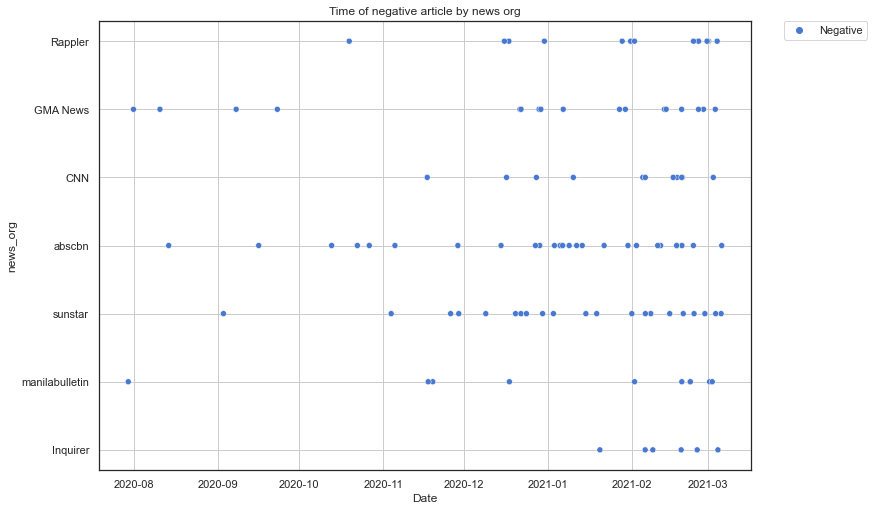

In [232]:
dfart['Date'] = pd.to_datetime(dfart['published_dates'])
dfneg=dfart[dfart['analysis']=='Negative']
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.scatterplot(data=dfneg, x="Date", y="news_org", hue = 'analysis').set_title('Time of negative article by news org')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

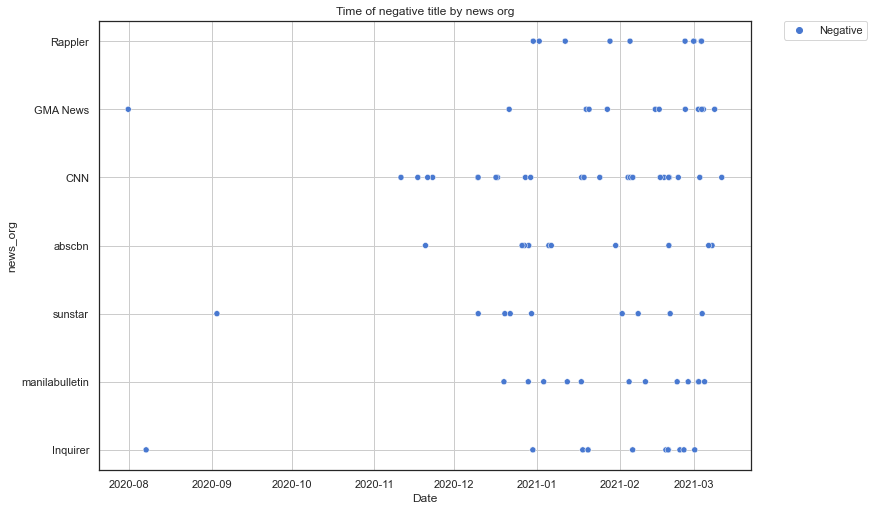

In [230]:
dftitle['Date'] = pd.to_datetime(dftitle['published_dates'])
dfneg=dftitle[dftitle['analysis']=='Negative']
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.scatterplot(data=dfneg, x="Date", y="news_org", hue = 'analysis').set_title('Time of negative title by news org')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

#### Sentiment Analysis Time Series by News Agency

Text(0.5, 1.0, 'Daily News Articles by Sentiment')

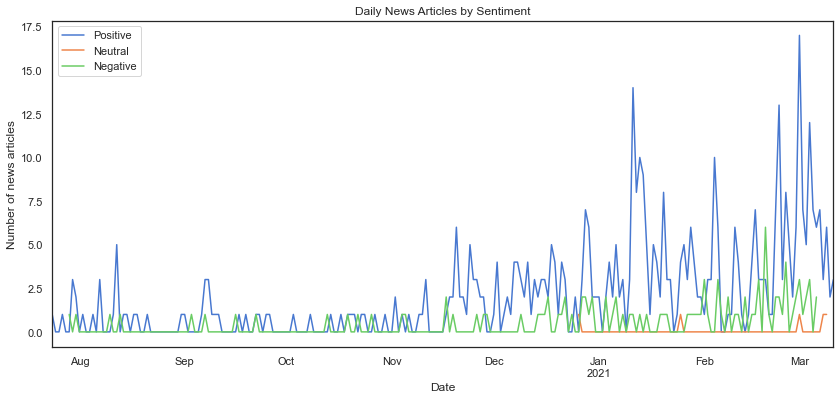

In [299]:
dfart['Date'] = pd.to_datetime(dfart['published_dates'])
#line chart of monthly streams
topic = dfart.set_index('Date')

#default is line so you can omit kind= parameter
data1 = topic[topic['analysis']=='Positive']['titles'].resample('D').count()
data2 = topic[topic['analysis']=='Neutral']['titles'].resample('D').count()
data3 = topic[topic['analysis']=='Negative']['titles'].resample('D').count()


fig= plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter

data1.plot(ax=ax, label='Positive')
data2.plot(ax=ax, label='Neutral')
data3.plot(ax=ax, label='Negative')

#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.legend()
plt.ylabel('Number of news articles')
plt.title('Daily News Articles by Sentiment')

Text(0.5, 1.0, 'Daily News Titles by Sentiment')

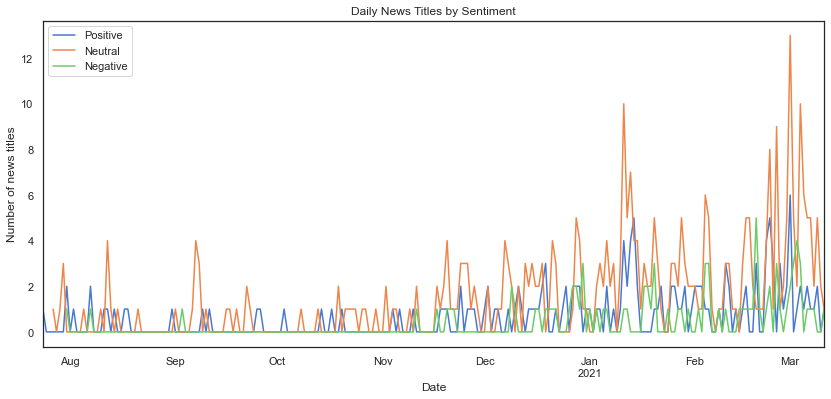

In [308]:
dfart['Date'] = pd.to_datetime(dftitle['published_dates'])
#line chart of monthly streams
topic = dftitle.set_index('Date')

#default is line so you can omit kind= parameter
data1 = topic[topic['analysis']=='Positive']['titles'].resample('D').count()
data2 = topic[topic['analysis']=='Neutral']['titles'].resample('D').count()
data3 = topic[topic['analysis']=='Negative']['titles'].resample('D').count()


fig= plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter

data1.plot(ax=ax, label='Positive')
data2.plot(ax=ax, label='Neutral')
data3.plot(ax=ax, label='Negative')

#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.legend()
plt.ylabel('Number of news titles')
plt.title('Daily News Titles by Sentiment')

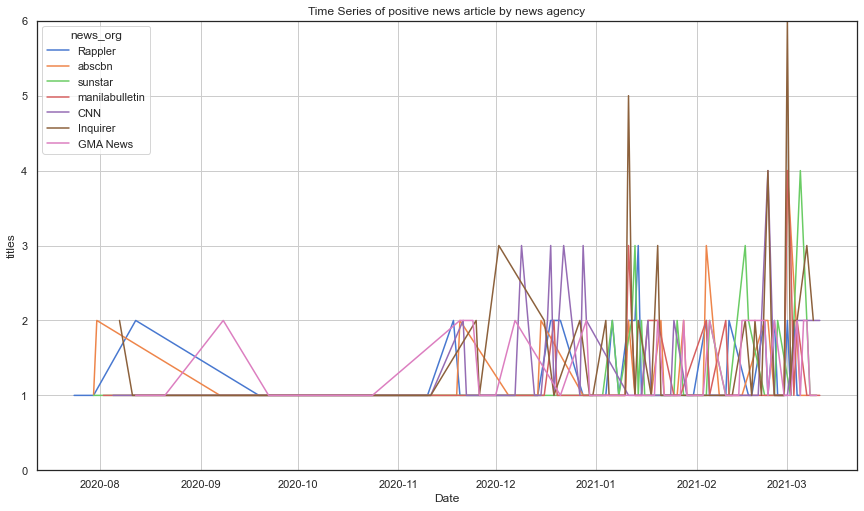

In [310]:
dfart['Date'] = pd.to_datetime(dfart['published_dates'])
date = dfart
date['Date'] = date['Date'].dt.date
dt0 = date[date['analysis']=='Positive']
dt0 = dt0.groupby(['Date','news_org'])['titles'].count().reset_index()
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.lineplot(x='Date', y='titles', hue = 'news_org', data=dt0).set_title('Time Series of positive news article by news agency')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0,6)
plt.grid()

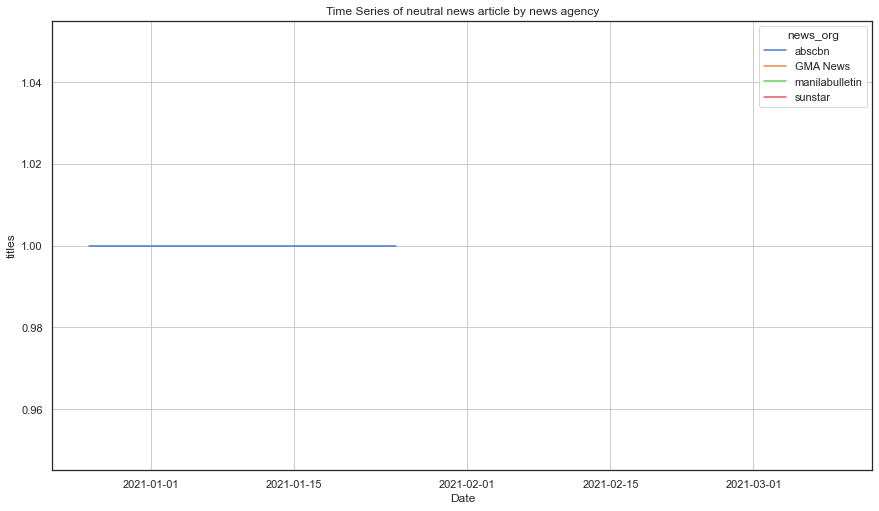

In [303]:
dfart['Date'] = pd.to_datetime(dfart['published_dates'])
date = dfart
date['Date'] = date['Date'].dt.date
dt0 = date[date['analysis']=='Neutral']
dt0 = dt0.groupby(['Date','news_org'])['titles'].count().reset_index()
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.lineplot(x='Date', y='titles', hue = 'news_org', data=dt0).set_title('Time Series of neutral news article by news agency')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

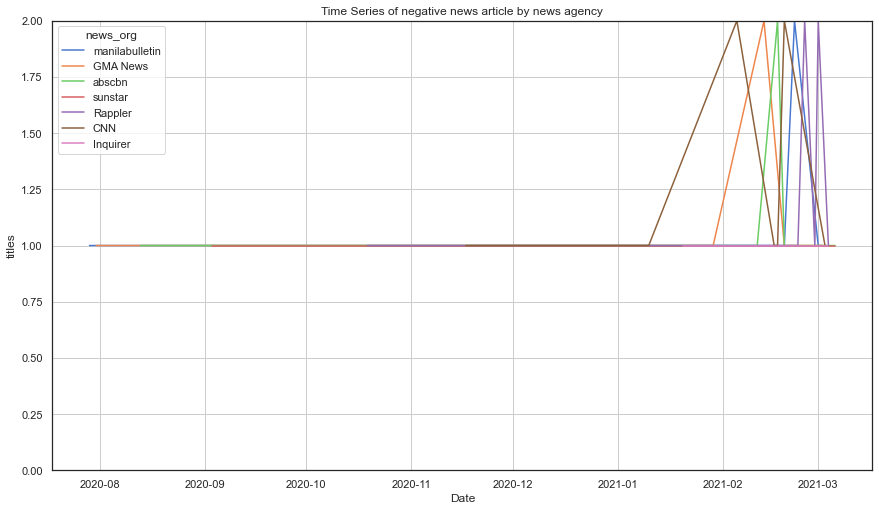

In [309]:
dfart['Date'] = pd.to_datetime(dfart['published_dates'])
date = dfart
date['Date'] = date['Date'].dt.date
dt0 = date[date['analysis']=='Negative']
dt0 = dt0.groupby(['Date','news_org'])['titles'].count().reset_index()
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.lineplot(x='Date', y='titles', hue = 'news_org', data=dt0).set_title('Time Series of negative news article by news agency')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0,2)
plt.grid()

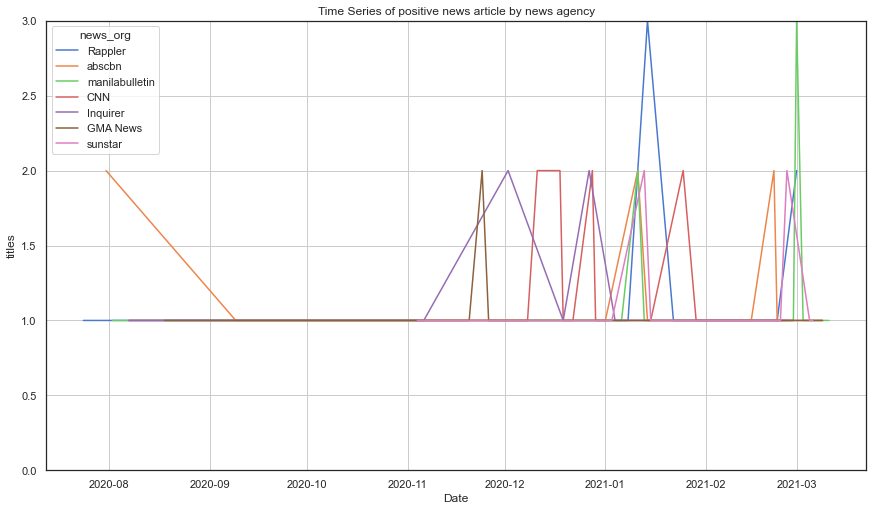

In [313]:
dftitle['Date'] = pd.to_datetime(dftitle['published_dates'])
date = dftitle
date['Date'] = date['Date'].dt.date
dt0 = date[date['analysis']=='Positive']
dt0 = dt0.groupby(['Date','news_org'])['titles'].count().reset_index()
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.lineplot(x='Date', y='titles', hue = 'news_org', data=dt0).set_title('Time Series of positive news article by news agency')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0,3)
plt.grid()

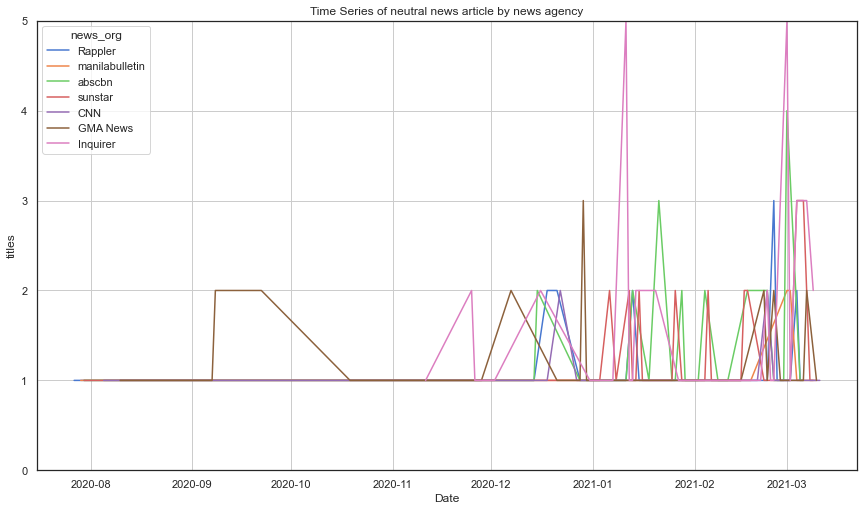

In [314]:
dftitle['Date'] = pd.to_datetime(dftitle['published_dates'])
date = dftitle
date['Date'] = date['Date'].dt.date
dt0 = date[date['analysis']=='Neutral']
dt0 = dt0.groupby(['Date','news_org'])['titles'].count().reset_index()
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.lineplot(x='Date', y='titles', hue = 'news_org', data=dt0).set_title('Time Series of neutral news article by news agency')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0,5)
plt.grid()

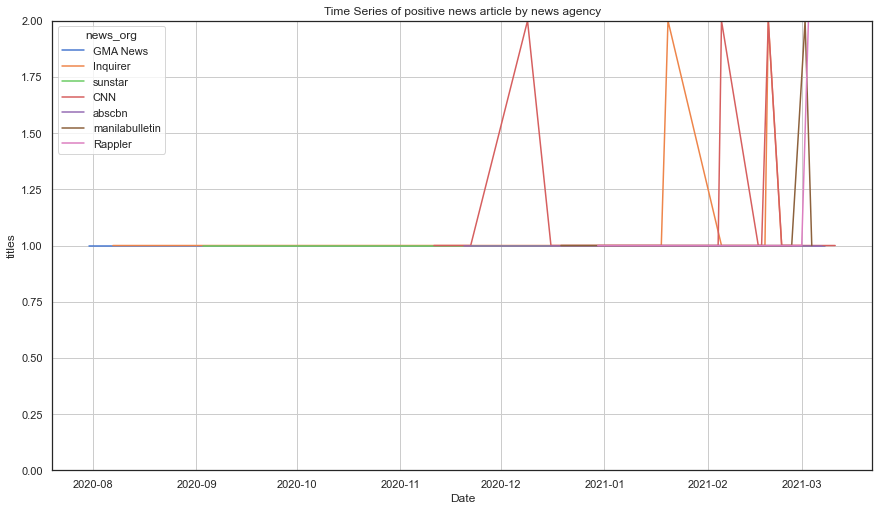

In [320]:
dftitle['Date'] = pd.to_datetime(dftitle['published_dates'])
date = dftitle
date['Date'] = date['Date'].dt.date
dt0 = date[date['analysis']=='Negative']
dt0 = dt0.groupby(['Date','news_org'])['titles'].count().reset_index()
sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.lineplot(x='Date', y='titles', hue = 'news_org', data=dt0).set_title('Time Series of positive news article by news agency')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(0,2)
plt.grid()

## Visualization for the topic Analysis

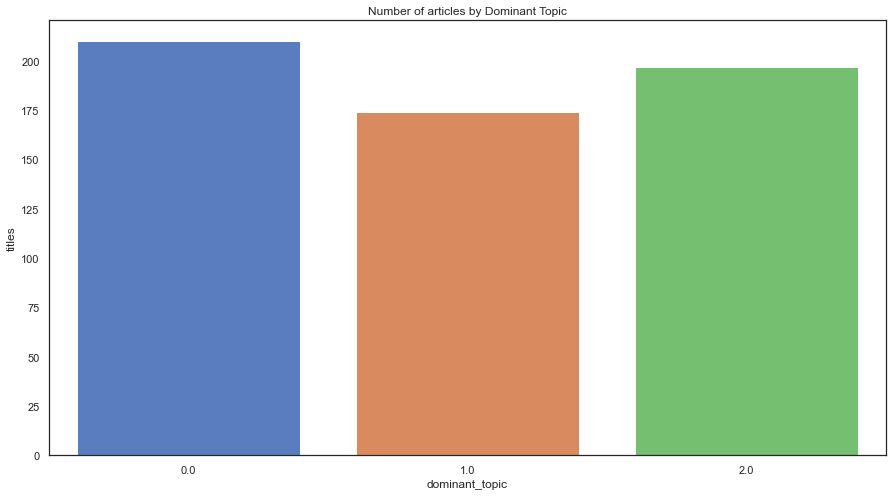

In [233]:
# Distribution of the Different Articles
distribution = dfart.groupby(['dominant_topic'])['titles'].count().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(x="dominant_topic", y="titles", data=distribution)
plt.title('Number of articles by Dominant Topic')
plt.show()

Text(0.5, 0.98, 'Dominant Topic by News agency')

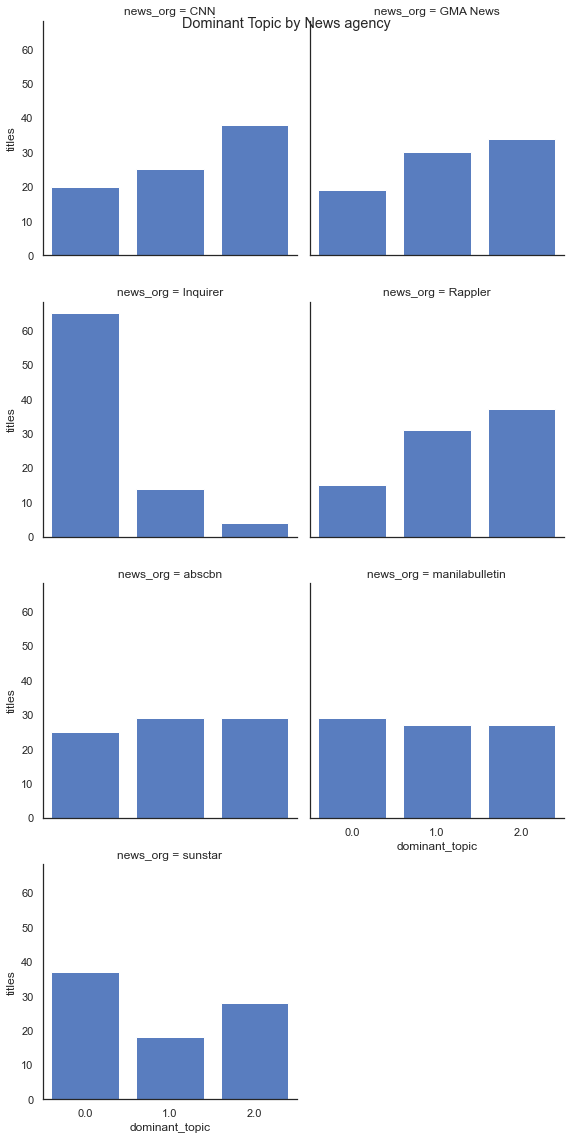

In [247]:
distribution = dfart.groupby(['news_org','dominant_topic'])['titles'].count().reset_index()
sns.set(style="white", palette="muted", color_codes=True)
g = sns.FacetGrid(distribution, col = 'news_org', col_wrap = 2, height = 4)
g.map(sns.barplot, "dominant_topic", "titles")
g.add_legend()
g.fig.suptitle('Dominant Topic by News agency')

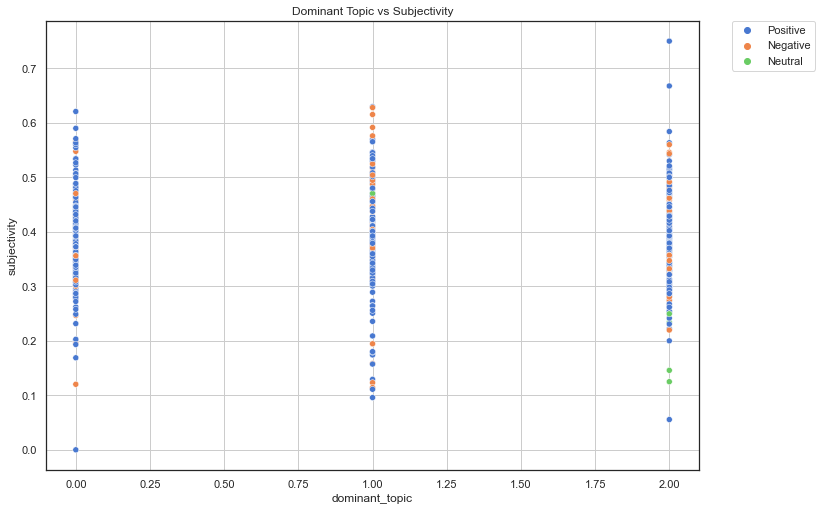

In [249]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.scatterplot(data=dfart, x="dominant_topic", y="subjectivity", hue='analysis').set_title('Dominant Topic vs Subjectivity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

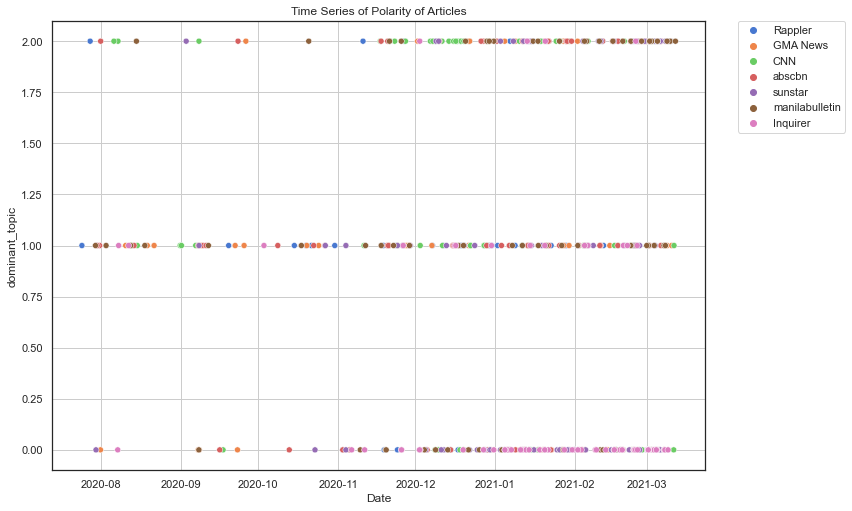

In [250]:
dfart['Date'] = pd.to_datetime(dfart['published_dates'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.scatterplot(data=dfart, x="Date", y="dominant_topic", hue = 'news_org').set_title('Time Series of Polarity of Articles')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

Text(0.5, 1.0, 'Daily News Articles by Topic')

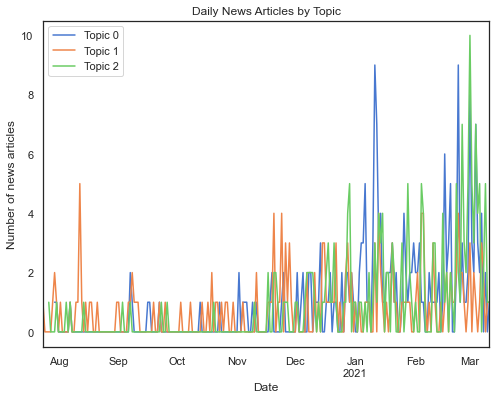

In [287]:
dfart['Date'] = pd.to_datetime(dfart['published_dates'])
#line chart of monthly streams
topic = dfart.set_index('Date')

#default is line so you can omit kind= parameter
data1 = topic[topic['dominant_topic']==0]['titles'].resample('D').count()
data2 = topic[topic['dominant_topic']==1]['titles'].resample('D').count()
data3 = topic[topic['dominant_topic']==2]['titles'].resample('D').count()


fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter

data1.plot(ax=ax, label='Topic 0')
data2.plot(ax=ax, label='Topic 1')
data3.plot(ax=ax, label='Topic 2')

#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.legend()
plt.ylabel('Number of news articles')
plt.title('Daily News Articles by Topic')


In [ ]:
data1.plot(ax=ax, label='CNN')
data2.plot(ax=ax, label='GMA News')
#data3.plot(ax=ax, label='Manila Times')
#data4.plot(ax=ax, label='Philippines News Agency')
#data5.plot(ax=ax, label='Philstar')
data6.plot(ax=ax, label='Rappler')
data7.plot(ax=ax, label='abscbn')
data8.plot(ax=ax, label='sunstar')
data9.plot(ax=ax, label='manilabulletin')
data10.plot(ax=ax, label='Inquirer')

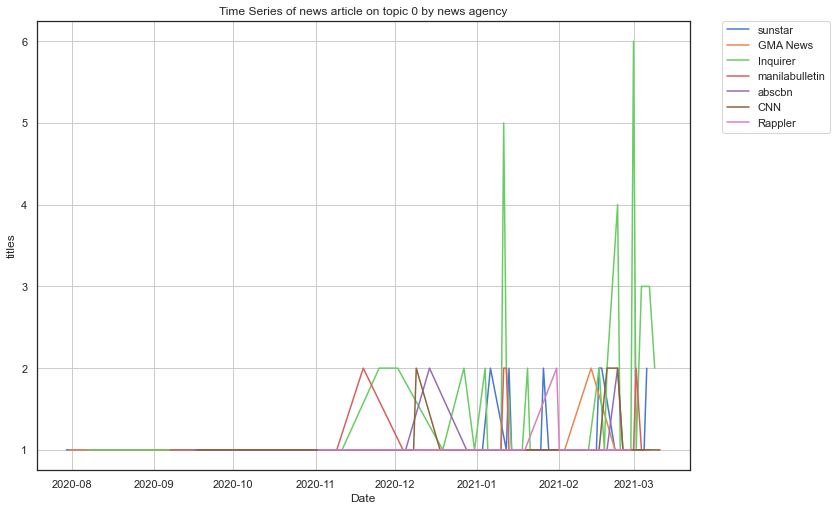

In [281]:
dfart['Date'] = pd.to_datetime(dfart['published_dates'])
date = dfart
date['Date'] = date['Date'].dt.date
dt0 = date[date['dominant_topic']==0]
dt0 = dt0.groupby(['Date','news_org'])['titles'].count().reset_index()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.lineplot(x='Date', y='titles', hue = 'news_org', data=dt0).set_title('Time Series of news article on topic 0 by news agency')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

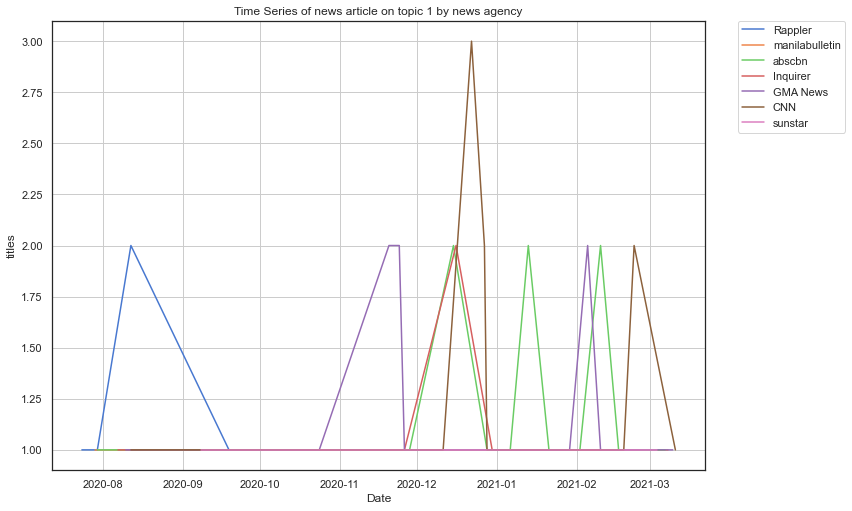

In [283]:
dfart['Date'] = pd.to_datetime(dfart['published_dates'])
date = dfart
date['Date'] = date['Date'].dt.date
dt0 = date[date['dominant_topic']==1]
dt0 = dt0.groupby(['Date','news_org'])['titles'].count().reset_index()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.lineplot(x='Date', y='titles', hue = 'news_org', data=dt0).set_title('Time Series of news article on topic 1 by news agency')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

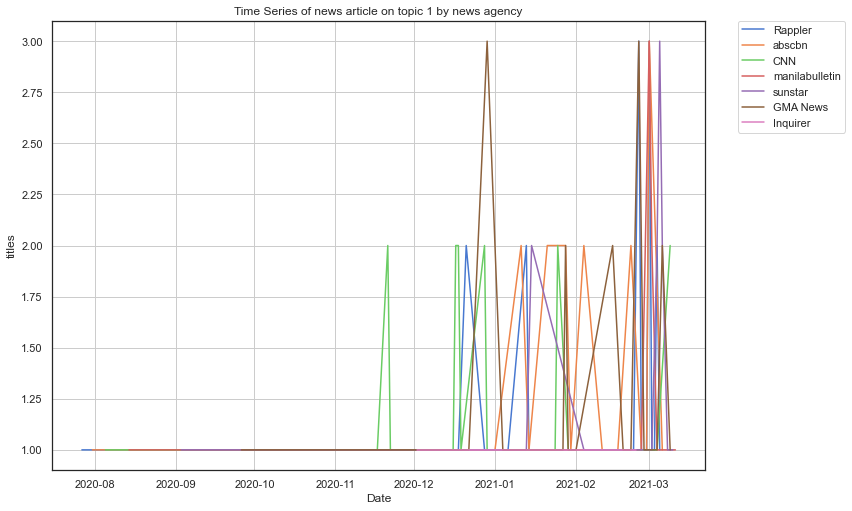

In [285]:
dfart['Date'] = pd.to_datetime(dfart['published_dates'])
date = dfart
date['Date'] = date['Date'].dt.date
dt0 = date[date['dominant_topic']==2]
dt0 = dt0.groupby(['Date','news_org'])['titles'].count().reset_index()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="white", palette="muted", color_codes=True)
sns.lineplot(x='Date', y='titles', hue = 'news_org', data=dt0).set_title('Time Series of news article on topic 1 by news agency')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()

In [ ]:
sns.lineplot(x='Date', y)